# **Customer segmentation: PCA & clustering**
![image](https://mswebappcdn.azureedge.net/episerverprod/580561b7653c477ebd7909a6c9465a72/435513bac8ab490dbfab4ac14a61e26b.png)

### Customer segmentation is the process of dividing customers into groups based on common characterstics so that the company can market each group effectively and appropriately.

# <span style="color:blue"><b>Business goal:</b></span>
## we want to maximize the value from each customer. 

### to acheive this goal, we want to know in advance how any particular marketing action will influence the customer. Customer Segmentation  has the potential to allow marketers to address each customer in most effective way and product management department to modify the product according to the distinct need and behavior of the customers.

# <span style="color:blue"><b>data goal:</b></span>
### to acheive the business goal we are using customer segmentation and personality analysis. technically we will be doing 
### 1.<span style="color:green"><b> Principal Component Analysis</b></span> for extracting most important features.
### 2. <span style="color:green"><b>Clustering</b></span> for dividing customers in distinct groups.
### 3. <span style="color:green"><b>Customer personality analysis</b></span> to know more about the customers behaviors, Demographic or other indicators.
#### so let's start


# About the dataset

### this data is from a groceries firm's database about their customers. it consists of 
### people
- **ID**: Customer's unique identifier <br >
- **Year_Birth**: Customer's birth year <br >
- **Education**: Customer's education level <br >
- **Marital_Status**: Customer's marital status <br >
- **Income**: Customer's yearly household income <br >
- **Kidhome**: Number of children in customer's household<br >
- **Teenhome**: Number of teenagers in customer's household<br >
- **Dt_Customer**: Date of customer's enrollment with the company<br >
- **Recency**: Number of days since customer's last purchase<br >
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise 



### Products
- **MntWines**: Amount spent on wine in last 2 years
- **MntFruits**: Amount spent on fruits in last 2 years
- **MntMeatProducts**: Amount spent on meat in last 2 years
- **MntFishProducts**: Amount spent on fish in last 2 years
- **MntSweetProducts**: Amount spent on sweets in last 2 years
- **MntGoldProds**: Amount spent on gold in last 2 years


### Promotion
- **NumDealsPurchases**: Number of purchases made with a discount
- **AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise


### place
- **NumWebPurchases**: Number of purchases made through the company’s website
- **NumCatalogPurchases**: Number of purchases made using a catalogue
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to company’s website in the last month

# importing Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.graph_objects as go
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# Loading Data

In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
print("number of data points", len(data))
data.head()

number of data points 2240


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Exploratory Data Analysis

#### checking the shape of the data

In [3]:
data.shape

(2240, 29)

#### investigate the dtypes of columns and number of non null values in these cloumns

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### getting the statistical summery of the dataset

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


# Data Cleaning

#### Let's look for missing values 

In [6]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### only Income variable has null values
#### we can simply drop the rows that have the null values. but in this case we will impute the median of that column into the missing values

In [7]:
data['Income'].fillna(data['Income'].median(), inplace = True)

#### the column Dt_Customer is not parsed as datetime. let's fix that first

In [8]:
data["Dt_Customer"] = pd.to_datetime(data['Dt_Customer'])

#### Now let's make a new feature out of that Dt_Customer column to see number of days a customer is registered in the firm's database. we are taking this value relative the most recent customer. 

In [9]:
dates = []
for i in data['Dt_Customer']:
    i = i.date()
    dates.append(i)
print("the most recent customer's enrollment date in the record is", max(dates))
print("the oldest customer's enrollment date is ", min(dates))

the most recent customer's enrollment date in the record is 2014-12-06
the oldest customer's enrollment date is  2012-01-08


#### Creating a new feature ("__Customer_for__") of the number of days the customer started to shop in the store relative to the last recorded date

In [10]:
days = []
d1 = max(dates)
for i in dates:
    delta  = d1 - i
    days.append(delta)
data["Customer_for"] = days
data["Customer_for"] = pd.to_numeric(data["Customer_for"], errors = "coerce")

# Feature Engineering

#### let's look at the unique values of some categorical features. we have just two of them 

In [11]:
print("total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("total categories in the feature Education:\n", data['Education'].value_counts(), "\n")

total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64 



#### now we will be creating some new feature out of existing features in the following steps

- Extract the age of a customers from  "year_birth" feature
- create another feature "spent" indicating the total amount spent in various categories
- create another feature "living_with" out of "marital status" to extract the current situation of the customers
- create another feature "Children" to indicate the total number of children in the house
- create a feature "Is_parent" to indicate parenthood status
- And a feature "purchaseNum" to indicate the number of purchases through different method



In [12]:
data["Age"] = 2022 - data["Year_Birth"]

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

data["Children"]=data["Kidhome"]+data["Teenhome"]

data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

data["PurchaseNum"] = data["NumWebPurchases"] + data["NumCatalogPurchases"] + data["NumStorePurchases"]

#### Renaming some of the columns

In [13]:
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#### dropping some Redundant features

In [14]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [15]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_for,Age,Spent,Children,Is_Parent,PurchaseNum
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,4.424054e+16,53.194196,605.798214,0.950446,0.715179,12.537054
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,2.006466e+16,11.984069,602.249288,0.751803,0.451430,7.205741
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,26.000000,5.000000,0.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,2.944080e+16,45.000000,68.750000,0.000000,0.000000,6.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,4.432320e+16,52.000000,396.000000,1.000000,1.000000,12.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,5.920560e+16,63.000000,1045.500000,1.000000,1.000000,18.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,9.184320e+16,129.000000,2525.000000,3.000000,1.000000,32.000000


# Data Visualization

Relative plot of some selective features:



<Figure size 576x396 with 0 Axes>

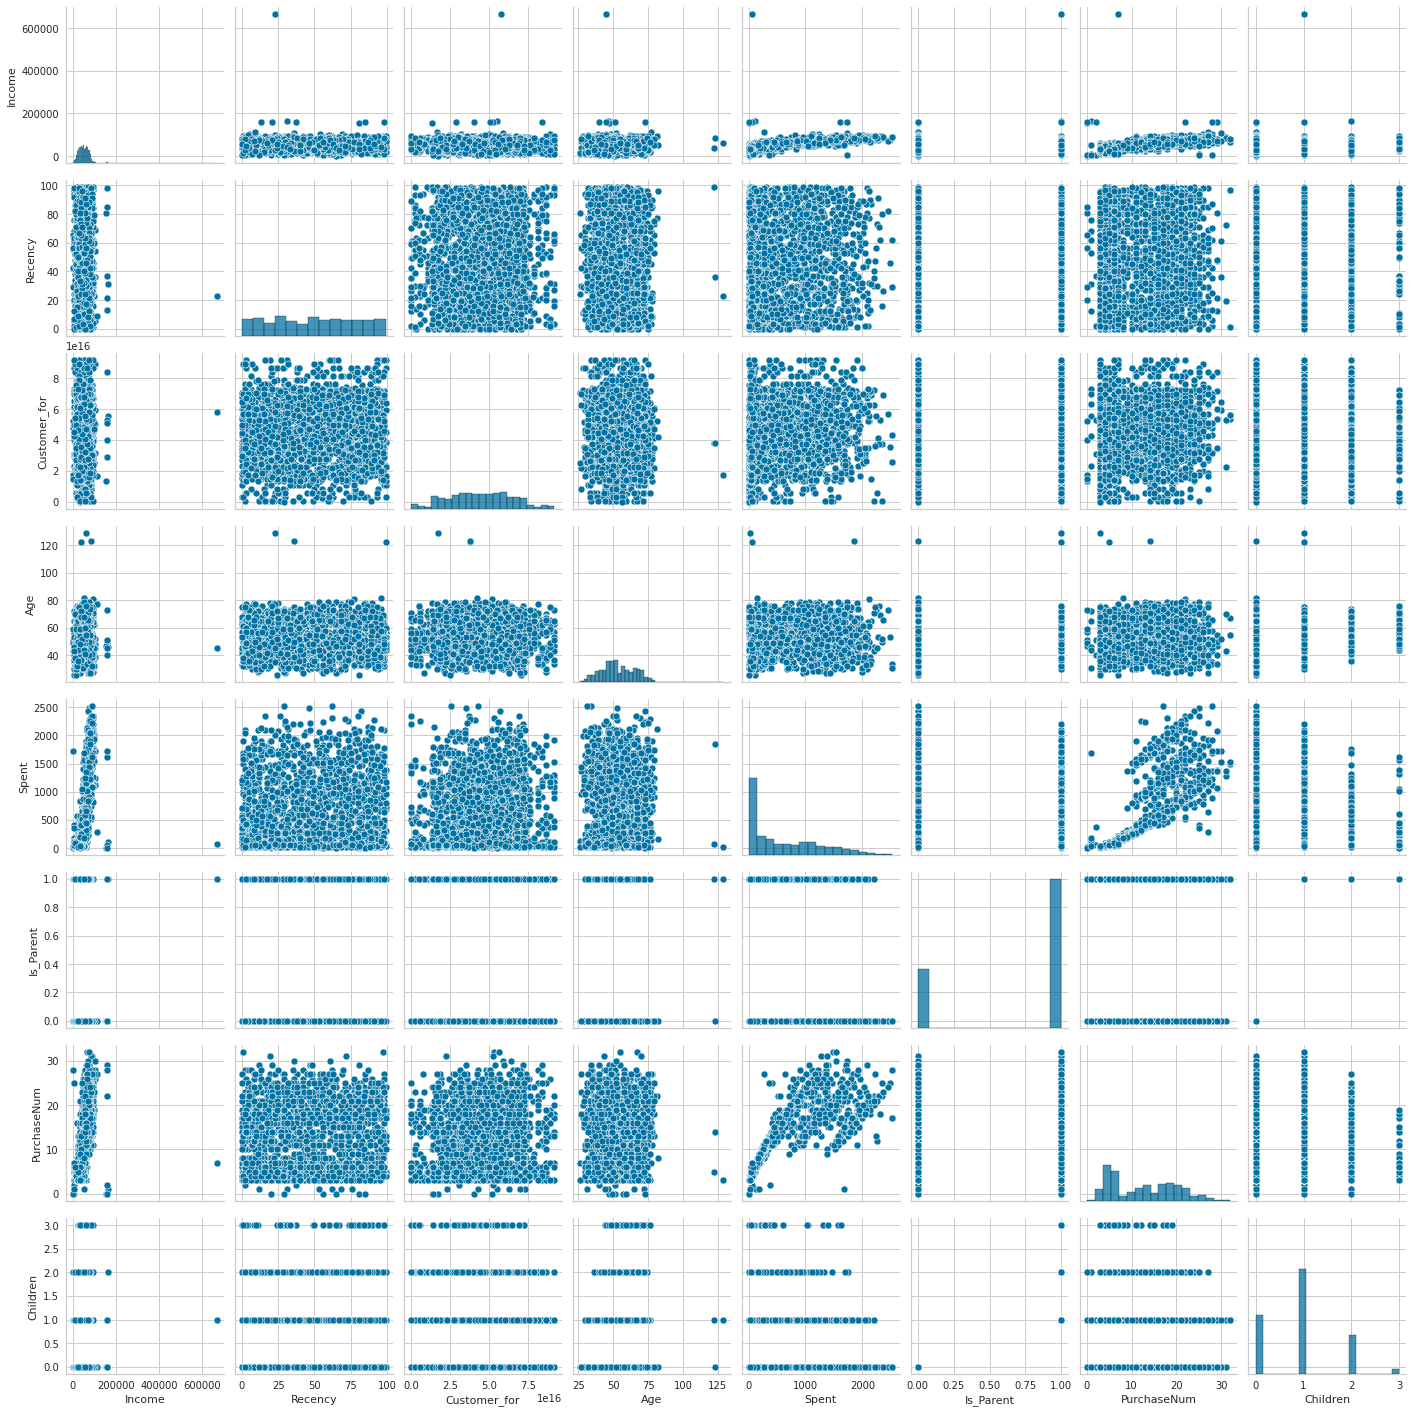

In [16]:
to_plot = ["Income", "Recency", "Customer_for", "Age", "Spent", "Is_Parent","PurchaseNum", "Children"]
print("Relative plot of some selective features:\n")
plt.figure()
sns.pairplot(data[to_plot])
plt.show()

#### Clearly we can see there are some outliers in the Age and Income feature. we will be removing them

In [17]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]

In [18]:
print(" total numbers of data points after removing the outliers are : ", len(data))

 total numbers of data points after removing the outliers are :  2236


#### Now let's plot the distributiob of  some features

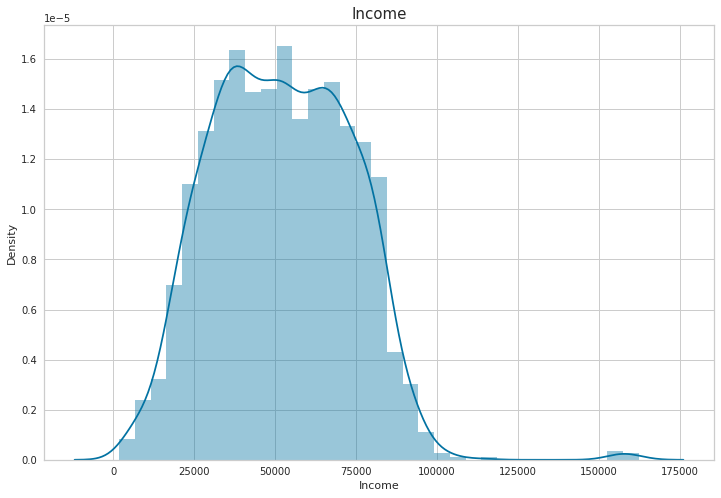

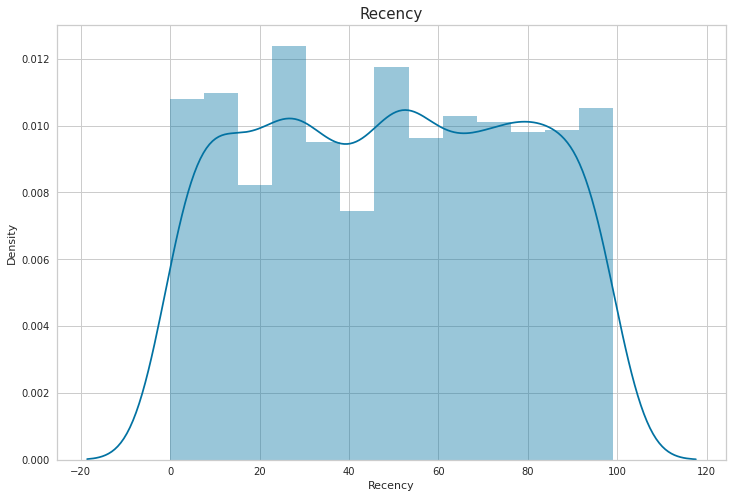

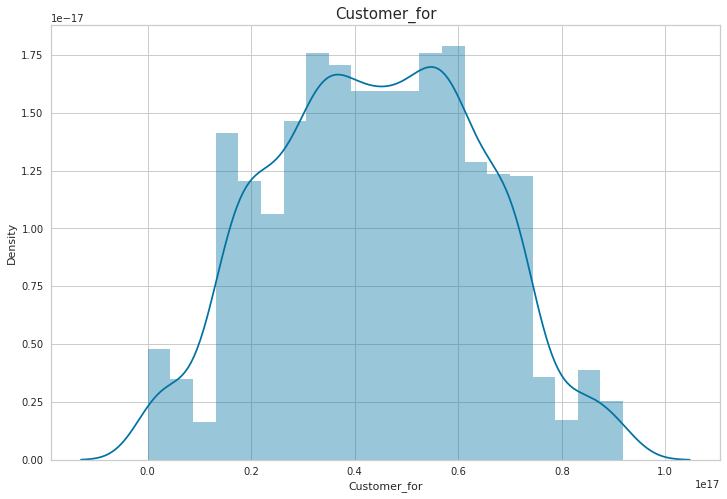

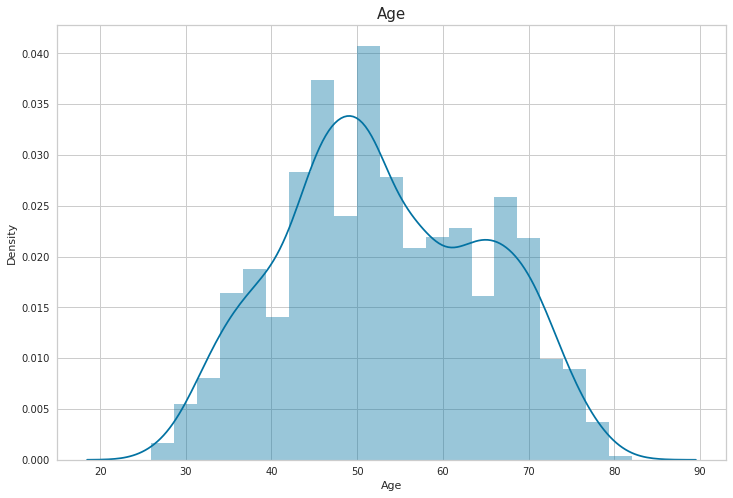

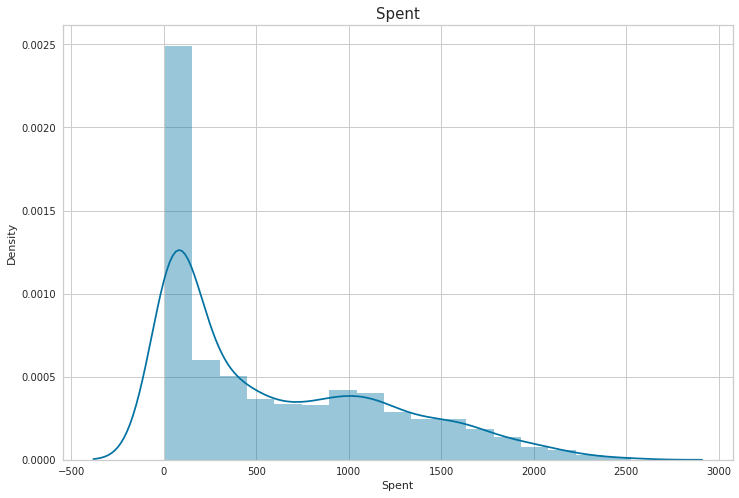

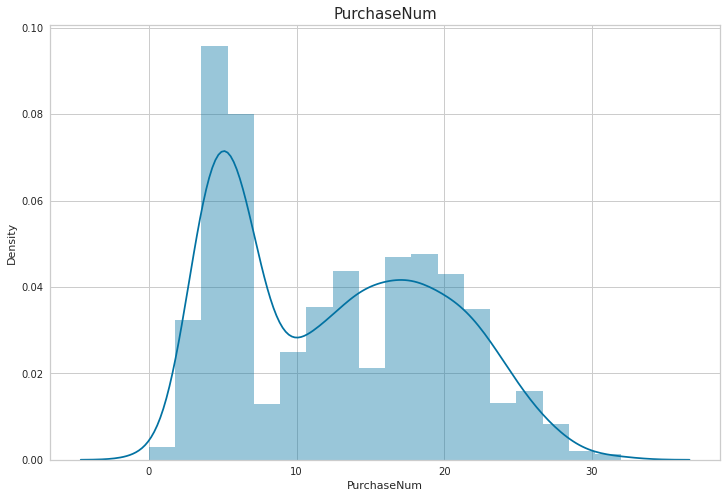

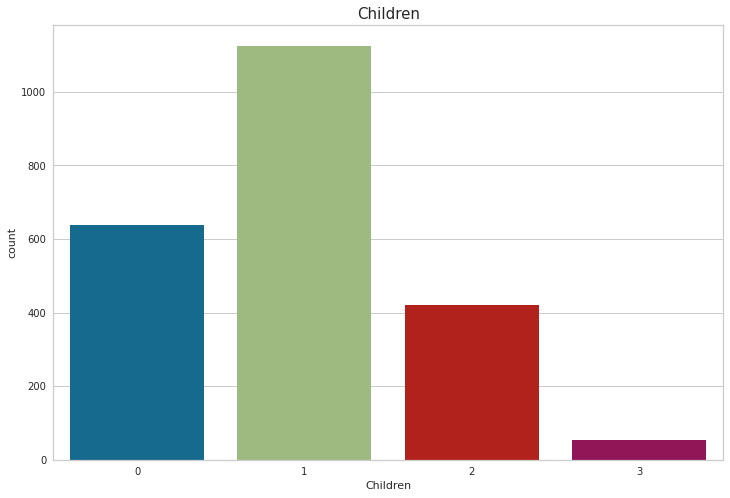

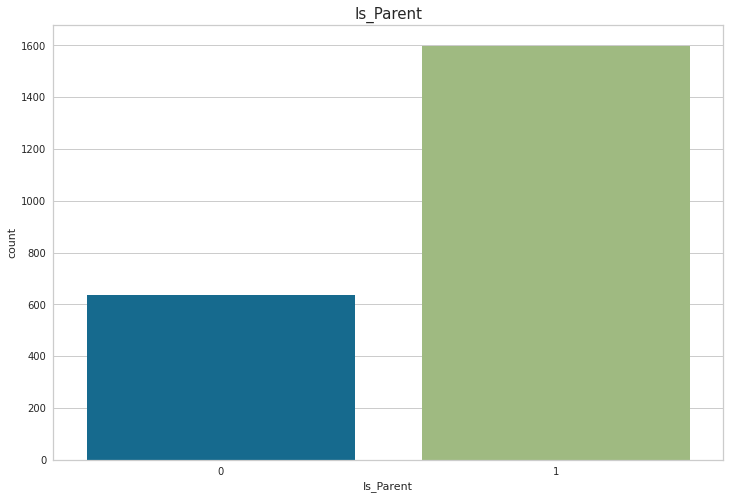

In [19]:
to_plot.remove("Children")
to_plot.remove("Is_Parent")
for col in to_plot:
    plt.figure(figsize = (12,8))
    sns.distplot(data[col])
    plt.title(f"{col}", size = 15)
    plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data["Children"])
plt.title("Children", size=15)
plt.show()

plt.figure(figsize=(12, 8))
sns.countplot(data["Is_Parent"])
plt.title("Is_Parent", size=15)
plt.show()

#### Visualizing the linear correlations between variables using Heatmap visualization. the measure used here is pearson correlation coefficient

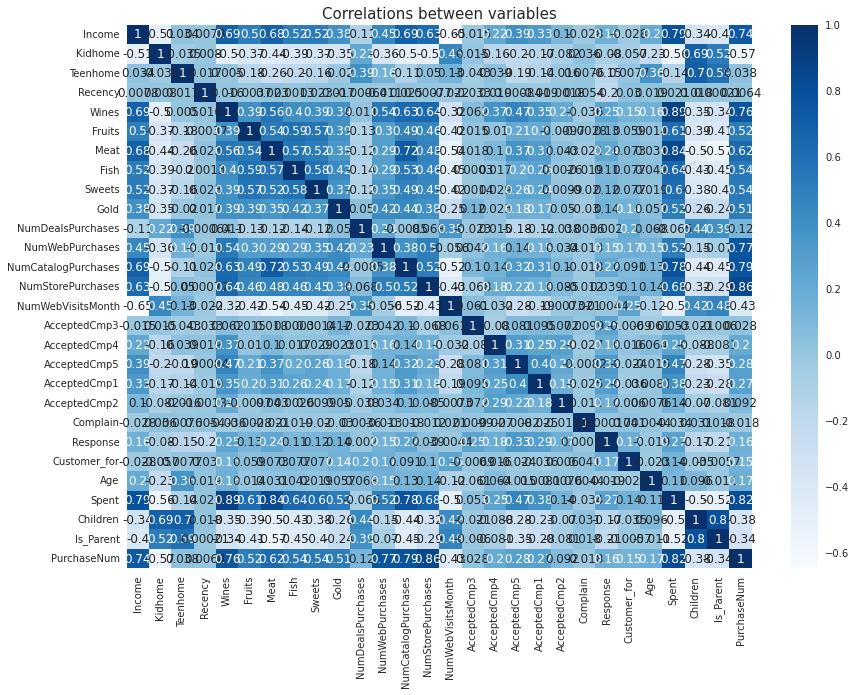

In [20]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(),annot = True,  cmap = "Blues")
plt.title("Correlations between variables", size = 15)
plt.show()

# Data Preprocessing

#### in this section we will be 
#### 1. encoding categorical variables 
#### 2. scaling the variables which is very important for cluster analysis


In [21]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("categorical features present in the data set are ", object_cols)

categorical features present in the data set are  ['Education', 'Living_With']


In [22]:
LE = LabelEncoder()
for i in object_cols:
    data[i] = data[[i]].apply(LE.fit_transform)

print("all features are now numerical")

all features are now numerical


In [23]:
ds = data.copy()
# creating a subset dataframe by droping the features on deals accepted and promotions
cols_del =  ["AcceptedCmp3","AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2", "Complain", "Response"]
ds = ds.drop(cols_del, axis = 1)

# now scaling 
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds), columns = ds.columns)
print("All features are now scaled")

All features are now scaled


In [24]:
print("Dataframe to be used for further modelling")
scaled_ds.head(5)

Dataframe to be used for further modelling


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_for,Age,Spent,Living_With,Children,Is_Parent,PurchaseNum
0,-0.352133,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,2.509801,-0.552429,0.692865,1.975467,1.016868,1.680176,-1.347635,-1.264308,-1.584362,1.312080
1,-0.352133,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.568970,-1.167738,-0.131421,-1.667017,1.273264,-0.962202,-1.347635,1.395139,0.631169,-1.186198
2,-0.352133,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.226884,1.293496,-0.543564,-0.172996,0.333146,0.282541,0.742041,-1.264308,-1.584362,1.034493
3,-0.352133,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.911056,-0.552429,0.280722,-1.925349,-1.290693,-0.918994,0.742041,0.065416,0.631169,-0.908611
4,1.429245,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.115201,0.062879,-0.131421,-0.823131,-1.034298,-0.305762,0.742041,0.065416,0.631169,0.201734


# Principal Component Analysis

#### Principal Component Analysis is a dimensionality Reduction Technique. 
### __Dimesionality Reduction__ : 
#### Dimensionality Reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables. 
### __PCA__ :
#### PCA is a technique for reducing the dimensionality of datasets , increasing the interpretability and minimizing information loss.

In [25]:
pca = PCA(n_components = 3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns = (["col_1", "col_2", "col_3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2236.0,2.681218e-17,2.937632,-5.807739,-2.749271,-0.688984,2.630864,7.673662
col_2,2236.0,1.053620e-16,1.664823,-4.173363,-1.357858,-0.177744,1.249032,5.714258
col_3,2236.0,1.027800e-17,1.247875,-4.086443,-0.869067,0.014034,0.787930,5.003489


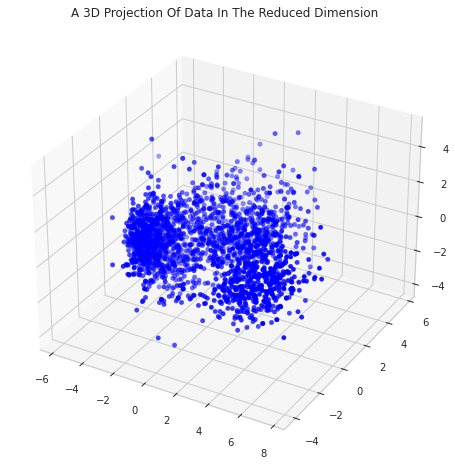

In [26]:
x = PCA_ds["col_1"]
y = PCA_ds["col_2"]
z = PCA_ds["col_3"]

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, c = "Blue", marker = "o")
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# clustering

#### since our data is ready, now we will be performing clustering via ___Agglomerative clustering___. Agglomerative clustering is a hierarchical clustering method that starts by making each point a cluster and iteratively reducing the number of clusters untill the desired number of clusters are reached.
#### but first we need to see what is the optimal number of clusters using ___Elbow method___

Elbow method to determine the number of clusters to be formed


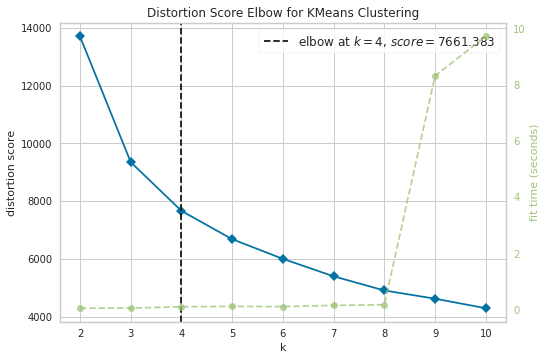

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
print("Elbow method to determine the number of clusters to be formed")
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

#### It can be seen that the optimal number of clusters is 4. 
#### Now we will be going for the part clustering

In [28]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

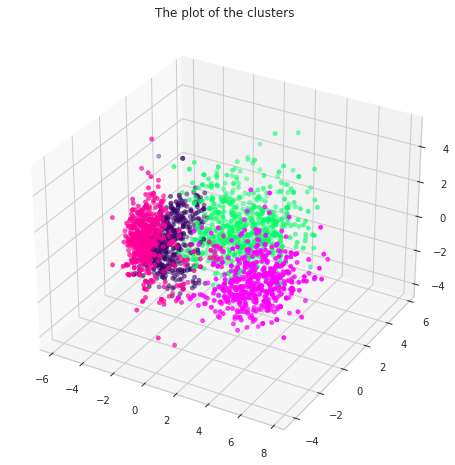

In [29]:
cmap = colors.ListedColormap(["#00FF66", "#330099", "#FF0099", "#FFFF00", "#FF00FF", "#330066"])
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x,y,z, c = PCA_ds["Clusters"], marker = "o", cmap = cmap)
ax.set_title("The plot of the clusters")
plt.show()

# Evaluating Models

#### In this section we will study the patterns in nthe clusters formed.
#### __firstly let us have a look at the  group distribution of clustering__

In [30]:
labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3"]

cluster0_num = data[data["Clusters"]==0].shape[0]
cluster1_num = data[data["Clusters"]==1].shape[0]
cluster2_num = data[data["Clusters"]==2].shape[0]
cluster3_num = data[data["Clusters"]==3].shape[0]
values = [cluster0_num, cluster1_num, cluster2_num, cluster3_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="Clusters")])
fig.show()

### Observations
#### Cluster 0 makes up most of the data
#### Others are evenly distributed

# Customer personality analysis

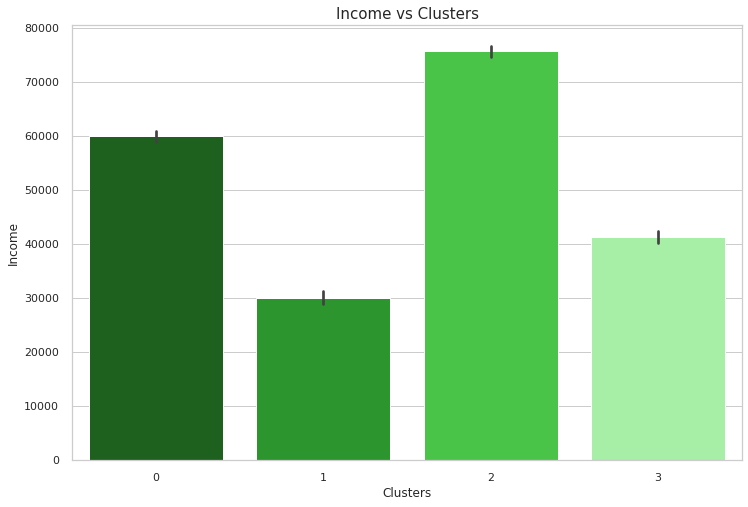

In [31]:
sns.set_theme(style = "whitegrid")
pal = ["#136b13", "#1ca61c", "#34d934", "#9bfa9b"]
plt.figure(figsize = (12,8))
sns.barplot(x = data["Clusters"], y = data["Income"], palette = pal)
plt.title("Income vs Clusters", size = 15)
plt.show()

### Observation
#### Cluster 2 has the highest Income
#### Clusters 1 has the lowest Income

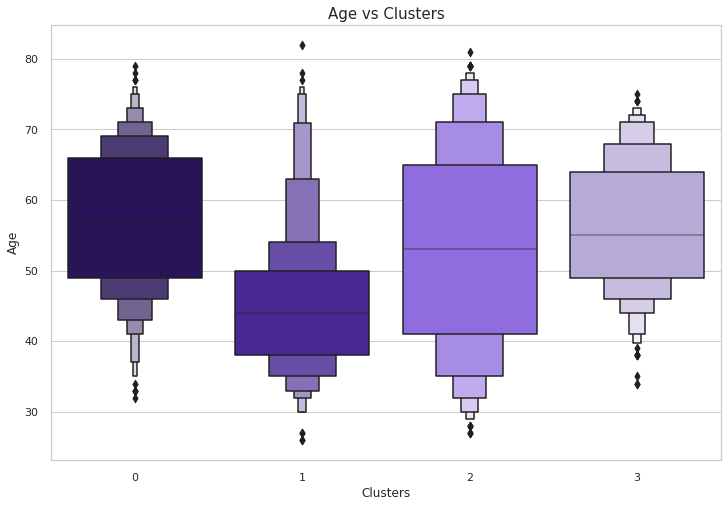

In [32]:
pal = ["#240963", "#4117a3", "#875af2", "#b4a2de"]
plt.figure(figsize = (12,8))
sns.boxenplot(x = data["Clusters"], y = data["Age"], palette = pal)
plt.title("Age vs Clusters", size = 15)
plt.show()

### Observations
#### Cluster 1 includes mostly young aged people (38 - 50 years with median around 44 )
#### Cluster 0 is the oldest cluster (mostly between 48 - 66)
#### C;luster 2 includes middle aged customers with median around 53

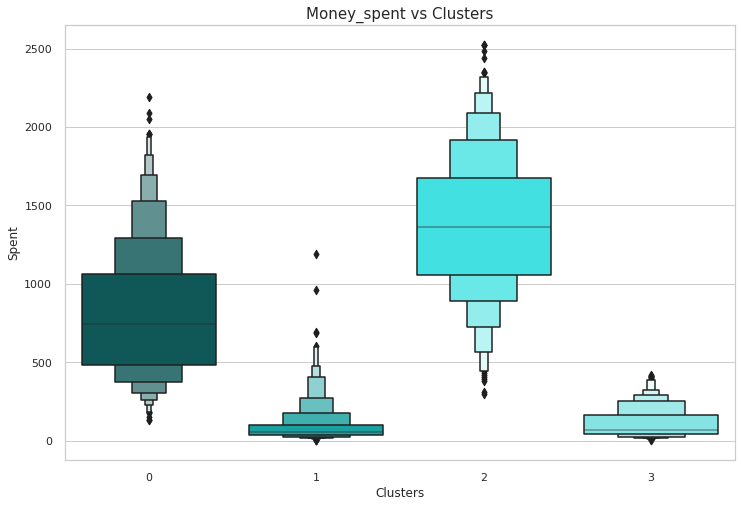

In [33]:
pal = ["#046363", "#05b5b5", "#28fafa", "#77f2f2"]
plt.figure(figsize = (12,8))
sns.boxenplot(x = data["Clusters"], y = data["Spent"], palette = pal)
plt.title("Money_spent vs Clusters", size = 15)
plt.show()

### Observation 
#### Cluster 1 spending the least money
#### Cluster 2 spending the most among others

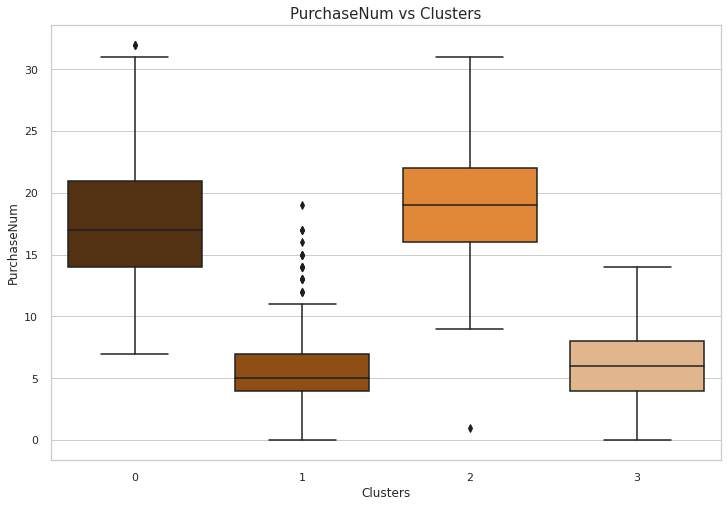

In [34]:
pal = ["#5e3209", "#a34e00", "#fc871c", "#f0b57f"]
plt.figure(figsize = (12,8))
sns.boxplot(x = data["Clusters"], y = data["PurchaseNum"], palette = pal)
plt.title("PurchaseNum vs Clusters", size = 15)
plt.show()

### Observations
#### Cluster 2 has the most purchase number
#### Cluster 1 does the least shopping

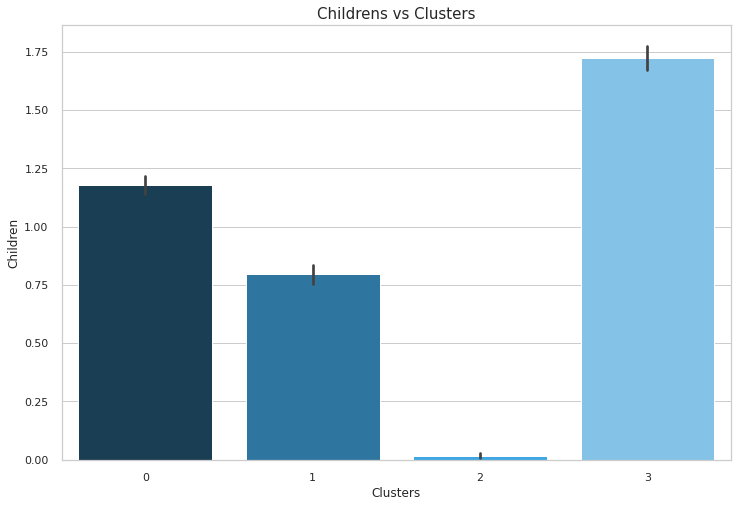

In [35]:
pal = ["#11405c", "#1b7ab3", "#24adff", "#74c6f7"]
plt.figure(figsize = (12,8))
sns.barplot(x = data["Clusters"], y = data["Children"], palette = pal)
plt.title("Childrens vs Clusters", size = 15)
plt.show()

### Observaions
#### clusters 2 has nearly no child
#### Cluster 3 has the most childen among others

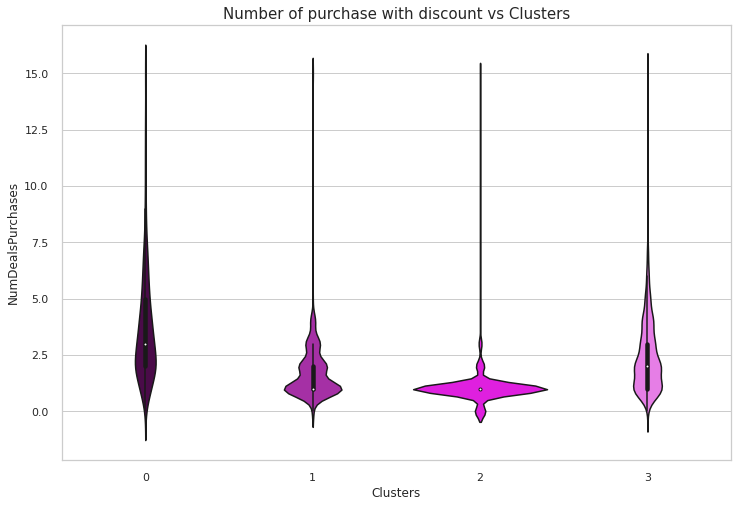

In [36]:
pal = ["#540054", "#b81db8", "#ff00ff", "#f76df7"]
plt.figure(figsize = (12,8))
sns.violinplot(x = data["Clusters"], y = data["NumDealsPurchases"], palette = pal)
plt.title("Number of purchase with discount vs Clusters", size = 15)
plt.show()

### Observation
#### Cluster 1 and cluster 2 both have a lower benifit with discount
#### Cluster 0 has made the most purchase with discount

 # Conclusions

#### __cluster 0__
- is the oldest cluster
- purchases the most when there is a discount

#### __cluster 1__
- Is the youngest cluster
- is least- earners
- has a tendency to spend less money
- has least purchase number
- benifits less from discounts

#### __Cluster 2__
- has the highest income 
- spends the most money
- has the highest purchase number
- has nearly no children
- benifits less from discounts

#### __Cluster 3__
- has the most children
-has a lesser amount of purchase number


## so that was it. I took inspirations from other notebooks yet if you find this helpful or good please upvote and leave a comment. 
## thank you folks